In [17]:
!pip install --upgrade catboost

In [16]:
#Import req for the ml stuff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as n
import kagglehub
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from google.colab import drive
drive.mount('/content/drive')

path = kagglehub.dataset_download("syedanwarafridi/vehicle-sales-data")

print("Path to dataset files:", path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using Colab cache for faster access to the 'vehicle-sales-data' dataset.
Path to dataset files: /kaggle/input/vehicle-sales-data


In [18]:
file_path = "/kaggle/input/vehicle-sales-data/car_prices.csv"
car_prices = pd.read_csv(file_path)
car_prices.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [19]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [20]:
#Imputing data :D
data = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')
data.info()

data.loc[:,'make'] = data.loc[:,['make']].fillna(data['make'].mode()[0])
data.loc[:,'model'] = data.loc[:,['model']].fillna(data['model'].mode()[0])
data.loc[:,'body'] = data.loc[:,['body']].fillna(data['body'].mode()[0])
data.loc[:,'trim'] = data.loc[:,['trim']].fillna(data['trim'].mode()[0])
data.loc[:,'color'] = data.loc[:,['color']].fillna(data['color'].mode()[0])
data.loc[:,'interior'] = data.loc[:,['interior']].fillna(data['interior'].mode()[0])
data.loc[:,'transmission'] = data.loc[:,['transmission']].fillna(data['transmission'].mode()[0])

data.loc[:,'condition'] = data.loc[:,['condition']].fillna(data['condition'].mean())
data.loc[:,'odometer'] = data.loc[:,['odometer']].fillna(data['odometer'].mean())
data.loc[:,'mmr'] = data.loc[:,['mmr']].fillna(data['mmr'].mean())

data.dropna(subset=['sellingprice'],axis='rows',inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


###Viewing Data

In [21]:
car_prices.describe().round().T  #transposed data

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.0,4.0,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,31.0,13.0,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.0,53399.0,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.0,9680.0,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.0,9750.0,1.0,6900.0,12100.0,18200.0,230000.0


In [22]:
car_prices.shape

(558837, 16)

In [23]:
car_prices.isna().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


In [24]:
car_prices.count()

,0
year,558837
make,548536
model,548438
trim,548186
body,545642
transmission,493485
vin,558833
state,558837
condition,547017
odometer,558743


###Data cleaning

In [26]:
car_prices.dropna(inplace=True)

In [25]:
car_prices.isna().sum()


,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


###Visualization

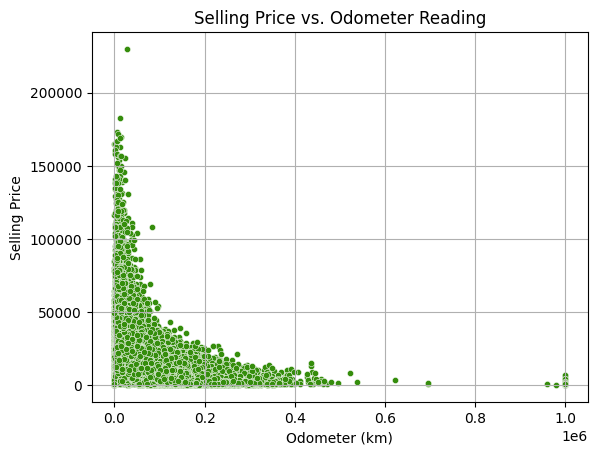

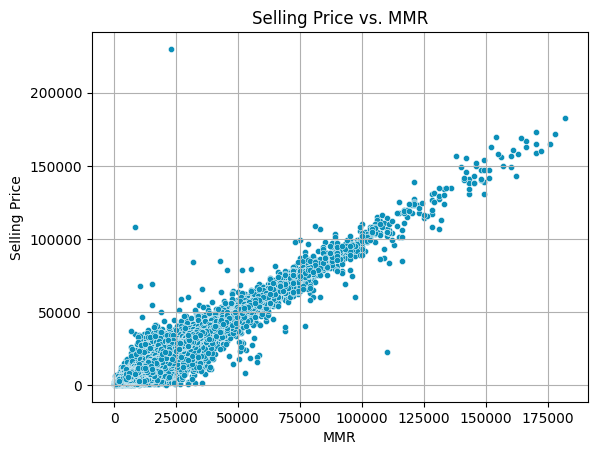

In [27]:
sns.scatterplot(car_prices, x="odometer", y="sellingprice", color="#358D0C", s=20)
plt.xlabel("Odometer (km)")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Odometer Reading")
plt.grid(True)

plt.show()

sns.scatterplot(car_prices, x="mmr", y="sellingprice", color="#0B8FB9", s=20)
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. MMR")
plt.grid(True)

plt.show()

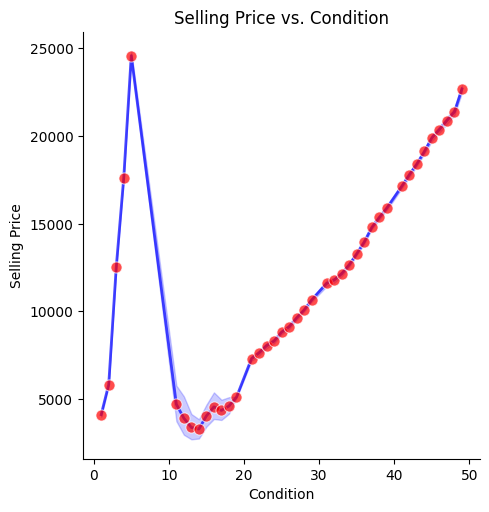

In [28]:
#plot for condition of the car to price :)))
sns.relplot(
    x="condition",
    y="sellingprice",
    color="#0000FF",
    kind="line",
    data=car_prices,
    linewidth=2,
    marker="o",
    markersize=8,
    alpha=0.7,
    dashes=False,
    legend="full",
    markerfacecolor="#FF0000",
)

plt.xlabel("Condition")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Condition")


plt.show()

/tmp/ipython-input-3033387290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(year_df, x="year", y="sellingprice", palette="Blues")


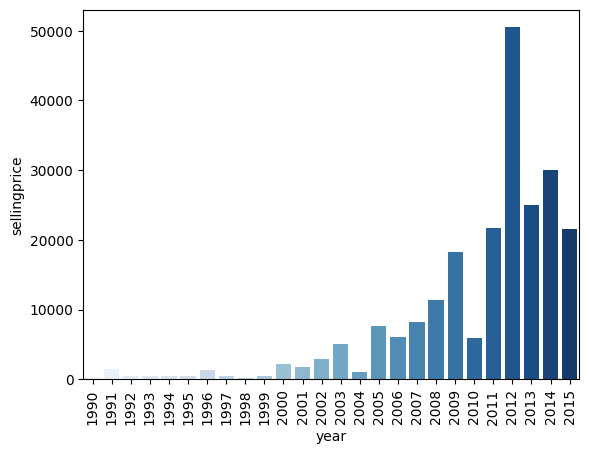

In [29]:
year_df = car_prices.groupby(by="year", as_index=False)["sellingprice"].first()
fig = sns.barplot(year_df, x="year", y="sellingprice", palette="Blues")
plt.xticks(rotation=90)
plt.show()

In [30]:
new_df = car_prices.groupby(
    by=["year", "make", "transmission", "condition", "color", "odometer", "mmr"],
    as_index=False,
)["sellingprice"].first()


new_df.sort_values(by="sellingprice", ascending=False).head(2)

yearly_mean_price = (
    new_df.groupby("year", as_index=False)["sellingprice"].mean()
).round(2)
yearly_mean_price

,year,sellingprice
0,1990,1429.55
1,1991,994.61
2,1992,874.74
3,1993,777.36
4,1994,856.47
5,1995,875.93
6,1996,922.86
7,1997,1081.33
8,1998,1262.23
9,1999,1520.47


/tmp/ipython-input-2829553738.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


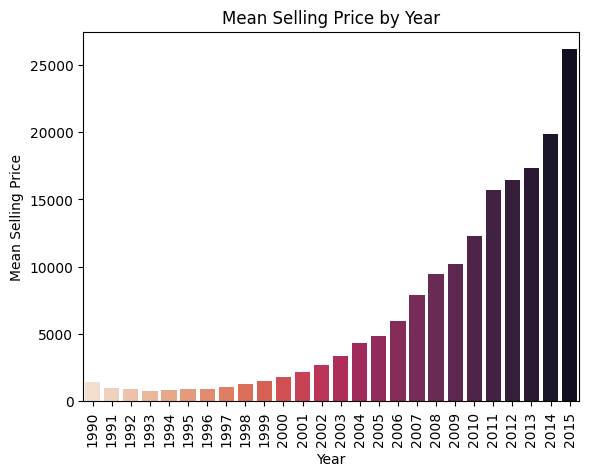

In [31]:
sns.barplot(
    x=yearly_mean_price["year"],
    y=yearly_mean_price["sellingprice"],
    palette="rocket_r",
)

plt.title("Mean Selling Price by Year")
plt.xlabel("Year")
plt.ylabel("Mean Selling Price")
plt.xticks(rotation=90)

plt.show()

/tmp/ipython-input-720005402.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


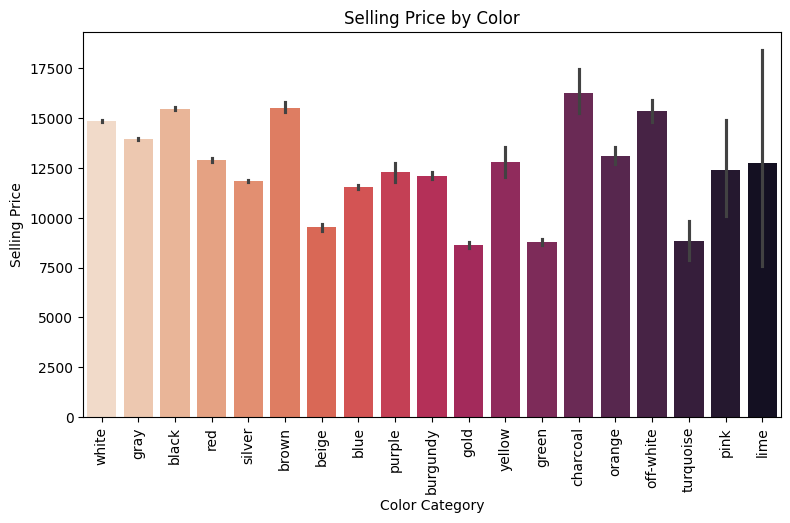

In [32]:
filtered_df = car_prices[car_prices["color"] != "—"]

palette = "Set3"

plt.figure(figsize=(9, 5))
sns.barplot(
    filtered_df,
    x="color",
    y="sellingprice",
    palette='rocket_r',
)
plt.xlabel("Color Category")
plt.ylabel("Selling Price")
plt.title("Selling Price by Color")

plt.xticks(rotation=90)

plt.show()

In [33]:
y = car_prices['sellingprice']
feature_columns = ['year', 'make', 'model', 'odometer', 'condition', 'body']
X = car_prices[feature_columns]

numerical_features = ['year', 'odometer', 'condition',]
categorical_features = ['make', 'model', 'body']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_pipeline.fit(X_train, y_train)

y_pred = tree_pipeline.predict(X_test)
print(y_pred)
print(f'Decision Tree MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Decision Tree R^2 score: {r2_score(y_test, y_pred)}')

[ 4800. 16700. 24400. ... 21800. 11800. 10800.]
Decision Tree MSE: 12356576.006539164
Decision Tree R^2 score: 0.8640490567399681


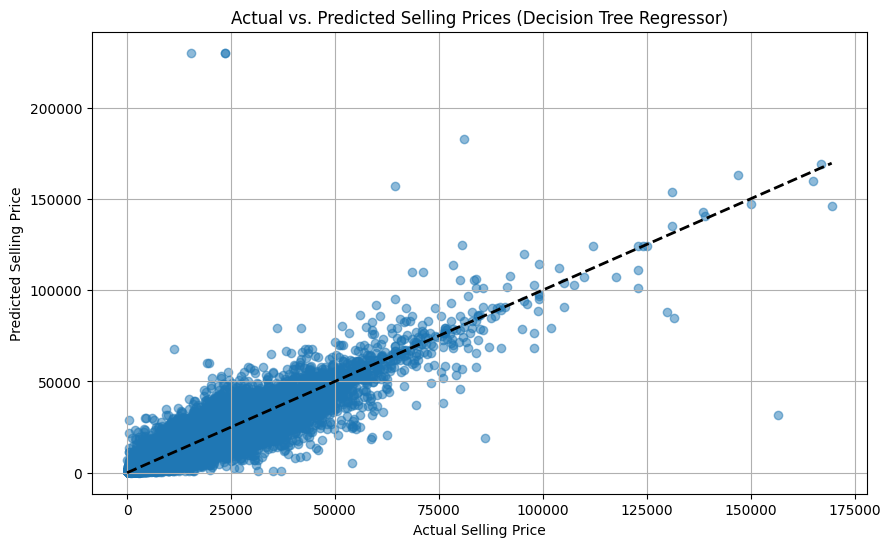

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices (Decision Tree Regressor)")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.show()

In [35]:
y = car_prices['sellingprice']
feature_columns = ['year', 'make', 'model', 'odometer', 'condition', 'body']
X = car_prices[feature_columns]

categorical_features = ['make', 'model','body']
numerical_features = ['year', 'odometer', 'condition']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Linear Regression R^2 score: {r2_score(y_test, y_pred)}')

[10480.474649   14166.19691408 23163.51707112 ... 28418.35301124
  9885.13106055  5754.39849818]
Linear Regression MSE: 35895106.00442183
Linear Regression R^2 score: 0.6174356126279181


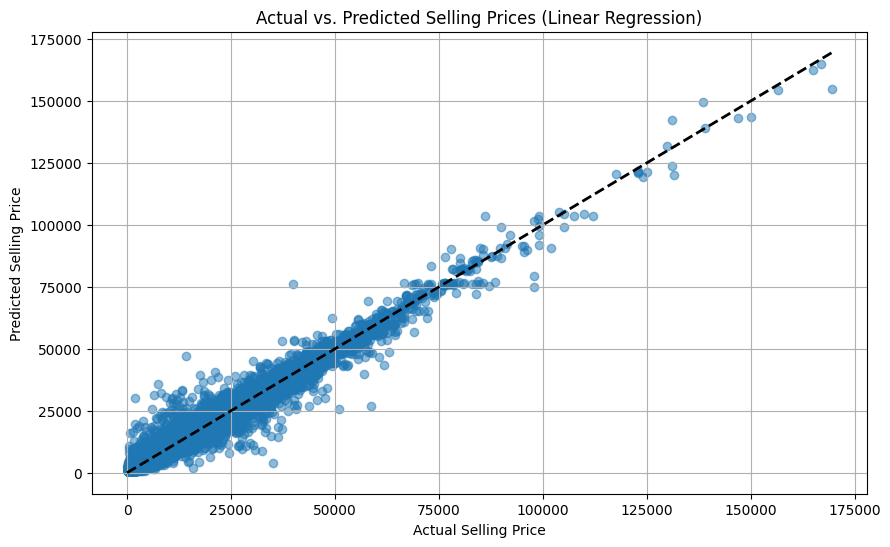

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices (Linear Regression)")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.show()

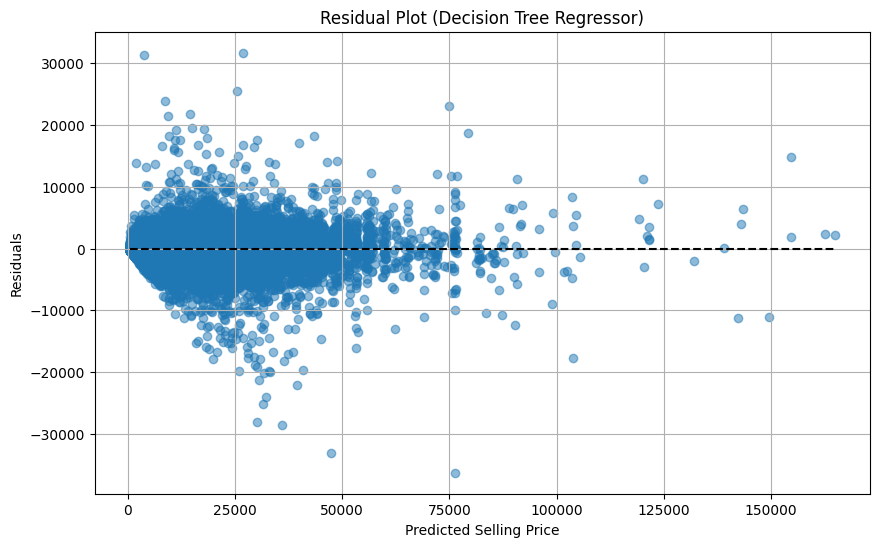

In [39]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Decision Tree Regressor)")
plt.hlines(0, y_pred.min(), y_pred.max(), colors='k', linestyles='dashed')
plt.grid(True)
plt.show()

In [36]:
y = car_prices['sellingprice']
X = car_prices.drop(['sellingprice', 'vin', 'saledate'], axis=1)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print(y_pred)
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Random Forest R^2 score: {r2_score(y_test, y_pred)}')

[ 4559.25954446 20722.82009683 23013.44839206 ... 26046.7649957
 13434.50103616  8495.76589878]
Random Forest MSE: 2245157.2831592327
Random Forest R^2 score: 0.9752980720345913


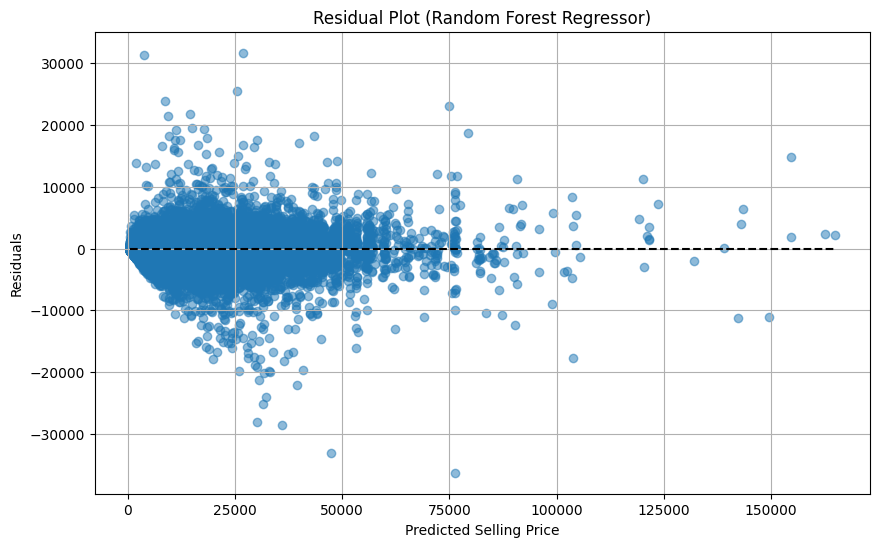

In [38]:
residuals_rf = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_rf, alpha=0.5)
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest Regressor)")
plt.hlines(0, y_pred.min(), y_pred.max(), colors='k', linestyles='dashed')
plt.grid(True)
plt.show()